For this assignment, you will analyse a dataset and apply several machine learning algorithm to it.
You are encouraged to select an interesting dataset yourself, e.g. from the field in which you study.
Alternatively, you can make use of a dataset provided by us. If you choose to utilize a specific
dataset, you should make sure it meets the following criteria:
– At least 1000 items (data points)
– At least 10 features (columns, excluding identifiers etc.), a mix of continuous and discrete
variables
– There should be a clear prediction (regression) task present.
– The dataset is publically accessible (no proprietary data)
In this case, you should send an email with a link to your dataset to the TA-mailbox so we can
verify whether the dataset is appropriate for the assignment.
In the remaining part of this section please add your description of the data set you use and the
learning tasks you will tackle in the next sections. You could look at what variables are present in
the data set, how they are distributed, what type of variables they are. Apply some pre-processing
2 Short Author Names / Group Number
if this is needed to make the data usable1
. You could make us

This code loads and describes the dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
# Load CSV dataset
# df=pd.read_csv("/content/HousePriceDataset (1).csv")
# Load CSV in YW 
df=pd.read_csv("HousePriceDataset.csv")
print(f"Number of houses in dataset: {len(df)}")
print(f"Number of variables in dataset: {len(df.columns)}")
df=df.drop(columns=['Unnamed: 0'])
# Display the column names (features) in the dataset
print(f"Features in the dataset: {list(df.columns)}")

# Display basic statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values in the dataset
print("\nMissing Values:")
print(df.isnull().sum())

# Display data types of each column
print("\nData Types:")
print(df.dtypes)

Number of houses in dataset: 21613
Number of variables in dataset: 21
Features in the dataset: ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

Summary Statistics:
                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.90000

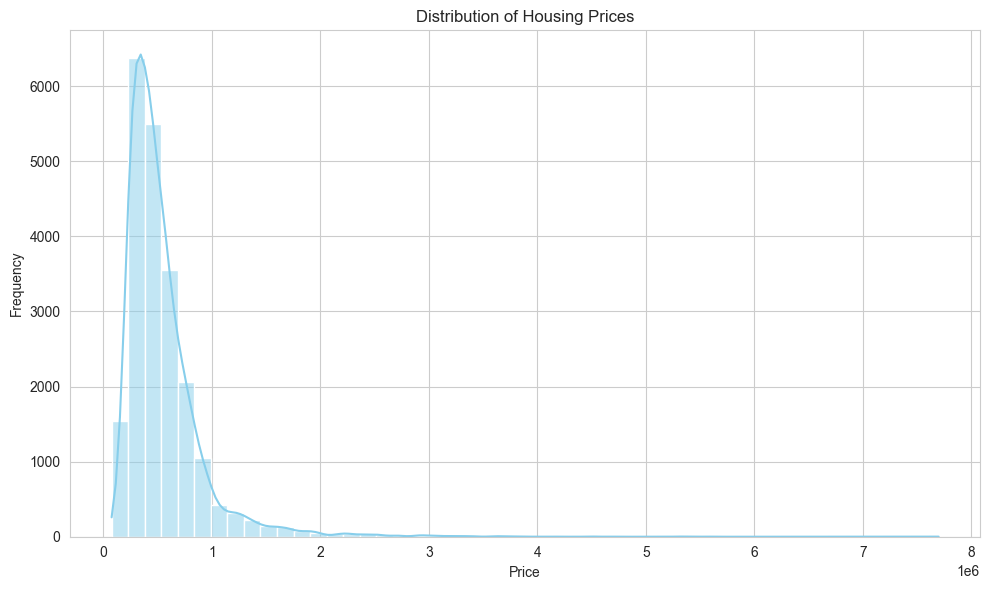

In [2]:
sns.set_style("whitegrid")

# Creating the distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')

# Setting the title and labels
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()

# Display the plot
plt.show()

In [117]:
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [44]:
### Clean the data  'sqft_lot15'
def clean_data(value):
    if isinstance(value, str) and value.startswith("b'"):
        return float(value[2:-1])
    return float(value)

df['sqft_lot15'] = df['sqft_lot15'].apply(clean_data)

In [45]:
X = df.drop(['id', 'price'], axis=1)
y = df['price']

### Feature selection

In [46]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Lasso(alpha=1.0)
model.fit(X_train, y_train)
coefficients = model.coef_
for feature,coef in zip(X.columns,coefficients):
    print('feature:',feature,'coefficients:',coef)



feature: bedrooms coefficients: -34334.442015692606
feature: bathrooms coefficients: 44561.56622425994
feature: sqft_living coefficients: 280.3917664809014
feature: sqft_lot coefficients: 0.08880681518124503
feature: floors coefficients: 7002.384504100736
feature: waterfront coefficients: 562255.0681799572
feature: view coefficients: 53646.26827564173
feature: condition coefficients: 24523.123341552924
feature: grade coefficients: 94570.55429110746
feature: sqft_above coefficients: -101.3528047855516
feature: sqft_basement coefficients: -132.37733292662298
feature: yr_built coefficients: -2680.9067407076254
feature: yr_renovated coefficients: 20.41639853181024
feature: zipcode coefficients: -552.1145482168922
feature: lat coefficients: 595902.9303906559
feature: long coefficients: -194495.05821335063
feature: sqft_living15 coefficients: 21.211086062592983
feature: sqft_lot15 coefficients: -0.32587398084448815


In [114]:
selected_features=['bedrooms','bathrooms','sqft_living','floors',
                   'waterfront','view','condition','grade','yr_built',
                  'lat']

In [115]:
X = df[selected_features]
y = df['price']

### Lasso

In [116]:
import warnings
warnings.filterwarnings('ignore')


# adjust alpha 
alphas = [0.0001, 0.001, 0.01, 0.1, 1.0, 2.0]
for alpha in alphas:
    model = Lasso(alpha=alpha)

    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    print(f"alpha={alpha}，cross valitation MSE: {-cv_scores.mean()}")


alpha=0.0001，cross valitation MSE: 41942712608.338
alpha=0.001，cross valitation MSE: 41942712639.55724
alpha=0.01，cross valitation MSE: 41942712951.675644
alpha=0.1，cross valitation MSE: 41942716074.23872
alpha=1.0，cross valitation MSE: 41942747393.49449
alpha=2.0，cross valitation MSE: 41942782907.29893


### RandomForestRegressor

In [119]:
model = RandomForestRegressor()
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"model={model}，cross valitation MSE: {-cv_scores.mean()}")

model=RandomForestRegressor()，cross valitation MSE: 24452247604.86062
